In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

%config InlineBackend.figure_format = 'retina'

In [3]:
covid = pd.read_csv("data/us-states.csv")

In [4]:
covid.head()

,date,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
0,2020-09-13,Alabama,1,137646,2350,124823.0,2217.0,12823.0,133.0
1,2020-09-13,Alaska,2,7074,41,7074.0,41.0,0.0,0.0
2,2020-09-13,Arizona,4,208128,5316,NaN,NaN,NaN,NaN
3,2020-09-13,Arkansas,5,69710,969,68542.0,964.0,1168.0,5.0
4,2020-09-13,California,6,760581,14333,759405.0,14333.0,1176.0,0.0


In [5]:
covid.shape

(55, 9)

In [6]:
population = pd.read_csv("data/nst-est2019-alldata.csv")
population.iloc[:10] #first 10 rows

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0,0,0,United States,308745538,308758105,309321666,311556874,313830990,...,0.000000,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059
1,20,1,0,0,Northeast Region,55317240,55318443,55380134,55604223,55775216,...,-5.254530,0.887909,-0.038355,-0.469783,-0.986097,-2.061965,-2.490484,-1.837048,-2.134447,-2.859713
2,20,2,0,0,Midwest Region,66927001,66929725,66974416,67157800,67336743,...,-2.365881,-0.963930,-0.973943,-0.006924,-0.762969,-1.388437,-1.241784,-0.557370,-0.922755,-1.111173
3,20,3,0,0,South Region,114555744,114563030,114866680,116006522,117241208,...,3.261349,5.130513,5.850458,5.292073,6.161501,7.277358,7.150074,6.198168,5.225519,5.203720
4,20,4,0,0,West Region,71945553,71946907,72100436,72788329,73477823,...,0.614245,2.723344,3.062896,3.162262,4.026429,4.987285,5.261078,4.021194,3.044951,2.312083
5,40,3,6,1,Alabama,4779736,4780125,4785437,4799069,4815588,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
6,40,4,9,2,Alaska,710231,710249,713910,722128,730443,...,-12.929847,0.587728,1.416798,-0.955359,-11.460949,-7.997118,-3.897349,-10.992765,-13.859140,-12.031221
7,40,4,8,4,Arizona,6392017,6392288,6407172,6472643,6554978,...,12.609078,4.278167,6.899802,6.376679,9.168478,9.597577,11.964782,10.878879,12.962934,13.687161
8,40,3,7,5,Arkansas,2915918,2916031,2921964,2940667,2952164,...,0.834503,3.294766,0.827785,0.057853,-0.091449,1.075446,1.486269,2.009593,0.958896,0.923429
9,40,4,9,6,California,37253956,37254519,37319502,37638369,37948800,...,-5.151429,1.276797,1.495016,1.649031,2.203551,1.984957,0.500044,-0.629909,-2.130954,-3.276681


In [7]:
population.shape

(57, 151)

In [8]:
#understand columns you have
population.columns ## don't get all the columns

Index(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'NAME', 'CENSUS2010POP',
       'ESTIMATESBASE2010', 'POPESTIMATE2010', 'POPESTIMATE2011',
       'POPESTIMATE2012',
       ...
       'RDOMESTICMIG2019', 'RNETMIG2011', 'RNETMIG2012', 'RNETMIG2013',
       'RNETMIG2014', 'RNETMIG2015', 'RNETMIG2016', 'RNETMIG2017',
       'RNETMIG2018', 'RNETMIG2019'],
      dtype='object', length=151)

In [9]:
#get all the columns
#list(population.columns)

In [10]:
covid['confirmed_cases'].isnull() #true if element is null, false othw


0     False
1     False
2      True
3     False
4     False
5      True
6      True
7      True
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17     True
18     True
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37     True
38    False
39    False
40     True
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49     True
50    False
51    False
52    False
53    False
54    False
Name: confirmed_cases, dtype: bool

In [11]:
#all rows with confirmed cases is null 
covid[covid["confirmed_cases"].isnull()]

,date,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
2,2020-09-13,Arizona,4,208128,5316,NaN,NaN,NaN,NaN
5,2020-09-13,Colorado,8,61311,1994,NaN,NaN,NaN,NaN
6,2020-09-13,Connecticut,9,54326,4480,NaN,NaN,NaN,NaN
7,2020-09-13,Delaware,10,18726,613,NaN,NaN,NaN,NaN
12,2020-09-13,Hawaii,15,10696,96,NaN,NaN,NaN,NaN
17,2020-09-13,Kansas,20,49396,533,NaN,NaN,NaN,NaN
18,2020-09-13,Kentucky,21,60187,1099,NaN,NaN,NaN,NaN
37,2020-09-13,Ohio,39,136568,4411,NaN,NaN,NaN,NaN
40,2020-09-13,Pennsylvania,42,148635,7915,NaN,NaN,NaN,NaN
49,2020-09-13,Virginia,51,132940,2722,NaN,NaN,NaN,NaN


In [12]:
#use true as 1, false as 0, count all the trues
covid["confirmed_cases"].isnull().sum()

10

In [13]:
#similar function
covid["confirmed_cases"].isna()

0     False
1     False
2      True
3     False
4     False
5      True
6      True
7      True
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17     True
18     True
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37     True
38    False
39    False
40     True
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49     True
50    False
51    False
52    False
53    False
54    False
Name: confirmed_cases, dtype: bool

In [14]:
#first ten elements of that column confirmed cases
c = covid["confirmed_cases"][:10]

In [15]:
len(c)

10

In [16]:
#c.count ignores the NA's
c.count()

6

In [17]:
#sum ignores the NA's
c.sum()

974396.0

In [18]:
c.sum(skipna=False)

nan

In [19]:
#ignores NAs
np.sum(c)

974396.0

In [20]:
#doesn't ignore NAs
sum(c)

nan

In [21]:
covid = covid.fillna(-1)
covid.head()

,date,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
0,2020-09-13,Alabama,1,137646,2350,124823.0,2217.0,12823.0,133.0
1,2020-09-13,Alaska,2,7074,41,7074.0,41.0,0.0,0.0
2,2020-09-13,Arizona,4,208128,5316,-1.0,-1.0,-1.0,-1.0
3,2020-09-13,Arkansas,5,69710,969,68542.0,964.0,1168.0,5.0
4,2020-09-13,California,6,760581,14333,759405.0,14333.0,1176.0,0.0


In [22]:
col = ["state", "fips", "deaths"]
covid = covid[col]
covid.head()

,state,fips,deaths
0,Alabama,1,2350
1,Alaska,2,41
2,Arizona,4,5316
3,Arkansas,5,969
4,California,6,14333


In [23]:
covid.shape

(55, 3)

In [24]:
population.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0,0,0,United States,308745538,308758105,309321666,311556874,313830990,...,0.000000,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059
1,20,1,0,0,Northeast Region,55317240,55318443,55380134,55604223,55775216,...,-5.254530,0.887909,-0.038355,-0.469783,-0.986097,-2.061965,-2.490484,-1.837048,-2.134447,-2.859713
2,20,2,0,0,Midwest Region,66927001,66929725,66974416,67157800,67336743,...,-2.365881,-0.963930,-0.973943,-0.006924,-0.762969,-1.388437,-1.241784,-0.557370,-0.922755,-1.111173
3,20,3,0,0,South Region,114555744,114563030,114866680,116006522,117241208,...,3.261349,5.130513,5.850458,5.292073,6.161501,7.277358,7.150074,6.198168,5.225519,5.203720
4,20,4,0,0,West Region,71945553,71946907,72100436,72788329,73477823,...,0.614245,2.723344,3.062896,3.162262,4.026429,4.987285,5.261078,4.021194,3.044951,2.312083


In [25]:
col = ["STATE", "NAME", "POPESTIMATE2019"]
population = population[col]
population.head()
#want to get rid of first five rows, only want states not regions

,STATE,NAME,POPESTIMATE2019
0,0,United States,328239523
1,0,Northeast Region,55982803
2,0,Midwest Region,68329004
3,0,South Region,125580448
4,0,West Region,78347268


In [26]:
population.iloc[:15]

,STATE,NAME,POPESTIMATE2019
0,0,United States,328239523
1,0,Northeast Region,55982803
2,0,Midwest Region,68329004
3,0,South Region,125580448
4,0,West Region,78347268
5,1,Alabama,4903185
6,2,Alaska,731545
7,4,Arizona,7278717
8,5,Arkansas,3017804
9,6,California,39512223


In [27]:
population = population[5:]
population.head()

,STATE,NAME,POPESTIMATE2019
5,1,Alabama,4903185
6,2,Alaska,731545
7,4,Arizona,7278717
8,5,Arkansas,3017804
9,6,California,39512223


In [28]:
population.shape

(52, 3)

In [29]:
covid.shape

(55, 3)

In [30]:
#fips and state number for covid and population respectively
#to merge or join the two tables
covid.head()

,state,fips,deaths
0,Alabama,1,2350
1,Alaska,2,41
2,Arizona,4,5316
3,Arkansas,5,969
4,California,6,14333


In [31]:
#outer join using the number instead of a string value
rates = covid.merge(population, how = "outer", left_on = "fips", right_on = "STATE")
rates.head()

,state,fips,deaths,STATE,NAME,POPESTIMATE2019
0,Alabama,1,2350,1.0,Alabama,4903185.0
1,Alaska,2,41,2.0,Alaska,731545.0
2,Arizona,4,5316,4.0,Arizona,7278717.0
3,Arkansas,5,969,5.0,Arkansas,3017804.0
4,California,6,14333,6.0,California,39512223.0


In [32]:
na_index = rates["NAME"].isnull()
rates[na_index]

,state,fips,deaths,STATE,NAME,POPESTIMATE2019
11,Guam,66,24,NaN,NaN,NaN
36,Northern Mariana Islands,69,2,NaN,NaN,NaN
50,Virgin Islands,78,19,NaN,NaN,NaN


In [33]:
rates = rates.dropna()
rates.shape

(52, 6)

In [34]:
rates.head()

,state,fips,deaths,STATE,NAME,POPESTIMATE2019
0,Alabama,1,2350,1.0,Alabama,4903185.0
1,Alaska,2,41,2.0,Alaska,731545.0
2,Arizona,4,5316,4.0,Arizona,7278717.0
3,Arkansas,5,969,5.0,Arkansas,3017804.0
4,California,6,14333,6.0,California,39512223.0


In [35]:
rates["rates"] = 1000*rates['deaths'] / rates["POPESTIMATE2019"]

In [36]:
rates.head()

,state,fips,deaths,STATE,NAME,POPESTIMATE2019,rates
0,Alabama,1,2350,1.0,Alabama,4903185.0,0.479280
1,Alaska,2,41,2.0,Alaska,731545.0,0.056046
2,Arizona,4,5316,4.0,Arizona,7278717.0,0.730348
3,Arkansas,5,969,5.0,Arkansas,3017804.0,0.321094
4,California,6,14333,6.0,California,39512223.0,0.362749


If you have problems with running functions, make a new copy of the dataframe because sometimes python doesn't like too much splicing on existing dataframes

In [37]:
rates = rates.sort_values(by = ["rates"])
rates.head()

,state,fips,deaths,STATE,NAME,POPESTIMATE2019,rates
1,Alaska,2,41,2.0,Alaska,731545.0,0.056046
12,Hawaii,15,96,15.0,Hawaii,1415872.0,0.067803
54,Wyoming,56,42,56.0,Wyoming,578759.0,0.072569
48,Vermont,50,58,50.0,Vermont,623989.0,0.092950
20,Maine,23,135,23.0,Maine,1344212.0,0.100431


In [38]:
rates = rates.reset_index(drop = True)
rates.head()

,state,fips,deaths,STATE,NAME,POPESTIMATE2019,rates
0,Alaska,2,41,2.0,Alaska,731545.0,0.056046
1,Hawaii,15,96,15.0,Hawaii,1415872.0,0.067803
2,Wyoming,56,42,56.0,Wyoming,578759.0,0.072569
3,Vermont,50,58,50.0,Vermont,623989.0,0.092950
4,Maine,23,135,23.0,Maine,1344212.0,0.100431


In [39]:
rates["rates"].median()

0.34672115672653503

In [40]:
rates["rates"].mean()

0.4777614375170417

In [41]:
rates["rates"].quantile(q = [0.1, 0.25, 0.5, 0.75, 0.9])

0.10    0.120297
0.25    0.219607
0.50    0.346721
0.75    0.621076
0.90    1.000105
Name: rates, dtype: float64

In [42]:
#linspace to get numbers between 0 and 1
q = np.linspace(0, 1, 8, endpoint=True)
q

array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
       0.71428571, 0.85714286, 1.        ])

In [43]:
qq = rates["rates"].quantile(q = q)
qq

0.000000    0.056046
0.142857    0.138943
0.285714    0.230004
0.428571    0.316019
0.571429    0.386831
0.714286    0.588249
0.857143    0.832122
1.000000    1.804397
Name: rates, dtype: float64

In [44]:
type(qq)

pandas.core.series.Series

In [45]:
#Series to numpy array using ".values"
qq.values

array([0.05604577, 0.13894278, 0.23000448, 0.31601922, 0.38683079,
       0.5882494 , 0.83212211, 1.80439734])

In [46]:
type(qq.values)

numpy.ndarray

In [47]:
boundaries = qq.values

In [48]:
boundaries.mean()

0.5440764859717657

In [49]:
#cutting the quantiles so get 7 buckets
rates["color"] = pd.qcut(rates["rates"], 7)
rates["color"]

0     (0.055, 0.139]
1     (0.055, 0.139]
2     (0.055, 0.139]
3     (0.055, 0.139]
4     (0.055, 0.139]
5     (0.055, 0.139]
6     (0.055, 0.139]
7     (0.055, 0.139]
8      (0.139, 0.23]
9      (0.139, 0.23]
10     (0.139, 0.23]
11     (0.139, 0.23]
12     (0.139, 0.23]
13     (0.139, 0.23]
14     (0.139, 0.23]
15     (0.23, 0.316]
16     (0.23, 0.316]
17     (0.23, 0.316]
18     (0.23, 0.316]
19     (0.23, 0.316]
20     (0.23, 0.316]
21     (0.23, 0.316]
22    (0.316, 0.387]
23    (0.316, 0.387]
24    (0.316, 0.387]
25    (0.316, 0.387]
26    (0.316, 0.387]
27    (0.316, 0.387]
28    (0.316, 0.387]
29    (0.316, 0.387]
30    (0.387, 0.588]
31    (0.387, 0.588]
32    (0.387, 0.588]
33    (0.387, 0.588]
34    (0.387, 0.588]
35    (0.387, 0.588]
36    (0.387, 0.588]
37    (0.588, 0.832]
38    (0.588, 0.832]
39    (0.588, 0.832]
40    (0.588, 0.832]
41    (0.588, 0.832]
42    (0.588, 0.832]
43    (0.588, 0.832]
44    (0.832, 1.804]
45    (0.832, 1.804]
46    (0.832, 1.804]
47    (0.832,

In [50]:
rates["color"].unique()

[(0.055, 0.139], (0.139, 0.23], (0.23, 0.316], (0.316, 0.387], (0.387, 0.588], (0.588, 0.832], (0.832, 1.804]]
Categories (7, interval[float64]): [(0.055, 0.139] < (0.139, 0.23] < (0.23, 0.316] < (0.316, 0.387] < (0.387, 0.588] < (0.588, 0.832] < (0.832, 1.804]]

In [51]:

## let's directly put colors here for our plot

colors = ["#ffffd4", "#fee391", "#fec44f", "#fe9929", "#ec7014", "#cc4c02", "#8c2d04"] # from colorbrewer2.org
rates["color"] = pd.qcut(rates["rates"], 7, labels = colors)
rates["color"].values

['#ffffd4', '#ffffd4', '#ffffd4', '#ffffd4', '#ffffd4', ..., '#8c2d04', '#8c2d04', '#8c2d04', '#8c2d04', '#8c2d04']
Length: 52
Categories (7, object): ['#ffffd4' < '#fee391' < '#fec44f' < '#fe9929' < '#ec7014' < '#cc4c02' < '#8c2d04']

In [52]:
rates.head()

,state,fips,deaths,STATE,NAME,POPESTIMATE2019,rates,color
0,Alaska,2,41,2.0,Alaska,731545.0,0.056046,#ffffd4
1,Hawaii,15,96,15.0,Hawaii,1415872.0,0.067803,#ffffd4
2,Wyoming,56,42,56.0,Wyoming,578759.0,0.072569,#ffffd4
3,Vermont,50,58,50.0,Vermont,623989.0,0.092950,#ffffd4
4,Maine,23,135,23.0,Maine,1344212.0,0.100431,#ffffd4


In [53]:
for i, row in rates.iterrows(): 
    print(row["state"], row["color"])

Alaska #ffffd4
Hawaii #ffffd4
Wyoming #ffffd4
Vermont #ffffd4
Maine #ffffd4
Oregon #ffffd4
Montana #ffffd4
Utah #ffffd4
West Virginia #fee391
Puerto Rico #fee391
Kansas #fee391
South Dakota #fee391
Wisconsin #fee391
North Dakota #fee391
Oklahoma #fee391
Nebraska #fec44f
Idaho #fec44f
Kentucky #fec44f
Washington #fec44f
Missouri #fec44f
North Carolina #fec44f
Tennessee #fec44f
Virginia #fe9929
New Hampshire #fe9929
Arkansas #fe9929
Colorado #fe9929
Minnesota #fe9929
California #fe9929
Ohio #fe9929
Iowa #fe9929
New Mexico #ec7014
Nevada #ec7014
Alabama #ec7014
Texas #ec7014
Indiana #ec7014
Georgia #ec7014
Florida #ec7014
South Carolina #cc4c02
Pennsylvania #cc4c02
Delaware #cc4c02
Maryland #cc4c02
Illinois #cc4c02
Michigan #cc4c02
Arizona #cc4c02
District of Columbia #8c2d04
Mississippi #8c2d04
Rhode Island #8c2d04
Louisiana #8c2d04
Connecticut #8c2d04
Massachusetts #8c2d04
New York #8c2d04
New Jersey #8c2d04


In [54]:
state2color = {}
for i, row in rates.iterrows(): 
    state2color[row["state"]] = row["color"]

In [55]:
state2color

{'Alaska': '#ffffd4',
 'Hawaii': '#ffffd4',
 'Wyoming': '#ffffd4',
 'Vermont': '#ffffd4',
 'Maine': '#ffffd4',
 'Oregon': '#ffffd4',
 'Montana': '#ffffd4',
 'Utah': '#ffffd4',
 'West Virginia': '#fee391',
 'Puerto Rico': '#fee391',
 'Kansas': '#fee391',
 'South Dakota': '#fee391',
 'Wisconsin': '#fee391',
 'North Dakota': '#fee391',
 'Oklahoma': '#fee391',
 'Nebraska': '#fec44f',
 'Idaho': '#fec44f',
 'Kentucky': '#fec44f',
 'Washington': '#fec44f',
 'Missouri': '#fec44f',
 'North Carolina': '#fec44f',
 'Tennessee': '#fec44f',
 'Virginia': '#fe9929',
 'New Hampshire': '#fe9929',
 'Arkansas': '#fe9929',
 'Colorado': '#fe9929',
 'Minnesota': '#fe9929',
 'California': '#fe9929',
 'Ohio': '#fe9929',
 'Iowa': '#fe9929',
 'New Mexico': '#ec7014',
 'Nevada': '#ec7014',
 'Alabama': '#ec7014',
 'Texas': '#ec7014',
 'Indiana': '#ec7014',
 'Georgia': '#ec7014',
 'Florida': '#ec7014',
 'South Carolina': '#cc4c02',
 'Pennsylvania': '#cc4c02',
 'Delaware': '#cc4c02',
 'Maryland': '#cc4c02',
 'Illino

In [56]:
#Dictionary Comprehension
state2color = {row["state"]: row["color"] for i, row in rates.iterrows()}
state2color

{'Alaska': '#ffffd4',
 'Hawaii': '#ffffd4',
 'Wyoming': '#ffffd4',
 'Vermont': '#ffffd4',
 'Maine': '#ffffd4',
 'Oregon': '#ffffd4',
 'Montana': '#ffffd4',
 'Utah': '#ffffd4',
 'West Virginia': '#fee391',
 'Puerto Rico': '#fee391',
 'Kansas': '#fee391',
 'South Dakota': '#fee391',
 'Wisconsin': '#fee391',
 'North Dakota': '#fee391',
 'Oklahoma': '#fee391',
 'Nebraska': '#fec44f',
 'Idaho': '#fec44f',
 'Kentucky': '#fec44f',
 'Washington': '#fec44f',
 'Missouri': '#fec44f',
 'North Carolina': '#fec44f',
 'Tennessee': '#fec44f',
 'Virginia': '#fe9929',
 'New Hampshire': '#fe9929',
 'Arkansas': '#fe9929',
 'Colorado': '#fe9929',
 'Minnesota': '#fe9929',
 'California': '#fe9929',
 'Ohio': '#fe9929',
 'Iowa': '#fe9929',
 'New Mexico': '#ec7014',
 'Nevada': '#ec7014',
 'Alabama': '#ec7014',
 'Texas': '#ec7014',
 'Indiana': '#ec7014',
 'Georgia': '#ec7014',
 'Florida': '#ec7014',
 'South Carolina': '#cc4c02',
 'Pennsylvania': '#cc4c02',
 'Delaware': '#cc4c02',
 'Maryland': '#cc4c02',
 'Illino

## Making a map in Matplotlib

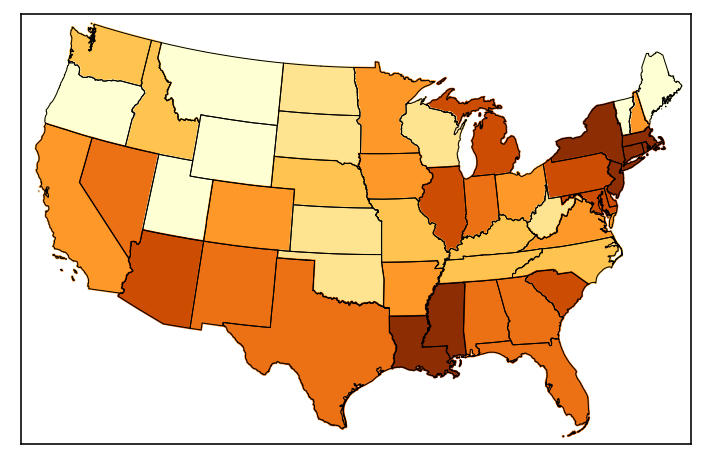

In [64]:
m = Basemap(llcrnrlon = -119, llcrnrlat = 22, urcrnrlon = -64, urcrnrlat = 49, 
           projection = "lcc", lat_1=33, lat_2=45, lon_0=-95)

shape = m.readshapefile("data/st99_d00", name = "states", drawbounds = True)
ax = plt.gca() #get current axes instance

#list of states in the data
states = [shapedict["NAME"] for shapedict in m.states_info]

for i, seq in enumerate(m.states): 
    state = states[i]
    color = state2color[state]
    poly = Polygon(seq, facecolor = color, edgecolor = color)
    ax.add_patch(poly)

In [58]:
state = [shapedict["NAME"] for shapedict in m.states_info]

## How to make a column bar

In [59]:
colors = ["#ffffd4", "#fee391", "#fec44f", "#fe9929", "#ec7014", "#cc4c02", "#8c2d04"]
bounds = [1,2,3,4,5,6,7,8]
boundaries = [0.055, 0.139, 0.23, 0.316, 0.387, 0.588, 0.832, 1.804]

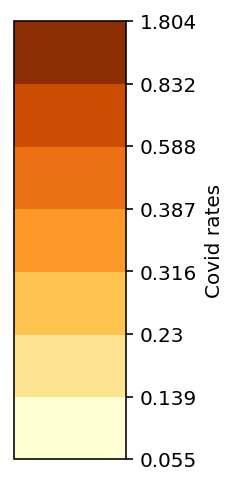

In [91]:
fig, ax = plt.subplots(figsize = (1, 8))
fig.subplots_adjust(bottom = 0.5) 

cmap = mpl.colors.ListedColormap(colors)

cb2 = ColorbarBase(ax, cmap = cmap, boundaries = bounds, ticks = bounds, 
                  label = boundaries, orientation = "vertical")

cb2.set_label("Covid rates")
cb2.set_ticklabels(boundaries)

In [92]:
boundaries = [0.00, 0.14, 0.23, 0.32, 0.39, 0.59, 0.83, 1.80]

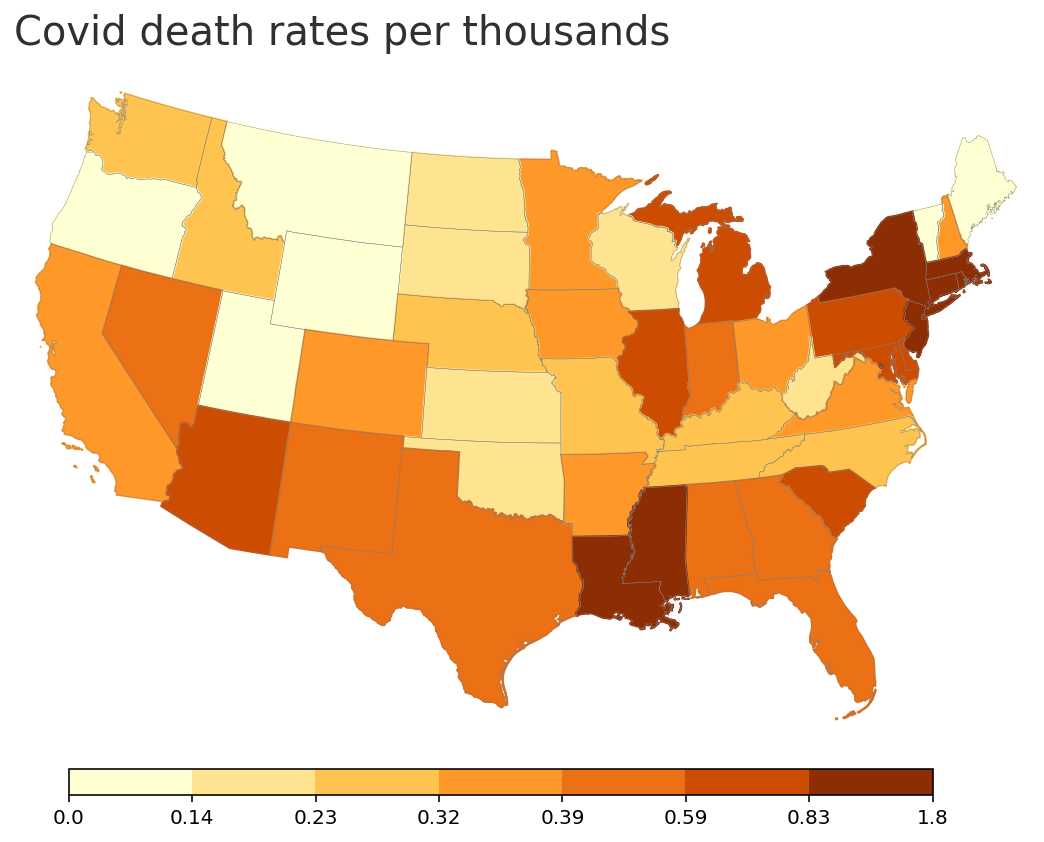

In [96]:
fig, ax = plt.subplots(figsize = (12, 6))
m = Basemap(llcrnrlon = -119, llcrnrlat = 22, urcrnrlon = -64, urcrnrlat = 49, 
           projection = "lcc", lat_1 = 33, lat_2 = 45, lon_0 = -95)

shape = m.readshapefile("data/st99_d00", name = "states", drawbounds = True, 
                       linewidth = 0.2, color = '#808080')

# list of states in the data
states = [shapedict['NAME'] for shapedict in m.states_info]
    
for i, seg in enumerate(m.states):
    state = states[i]
    color = state2color[state]
    poly = Polygon(seg, facecolor=color, edgecolor=color)
    ax.add_patch(poly)
    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.annotate("Covid death rates per thousands", xy = (0, 1.05), xycoords = 'axes fraction', 
            fontsize = 20, color = '#303030')

# [left, bottom, width, height]
ax_c = fig.add_axes([0.25, 0.05, 0.5, 0.03])

cmap = mpl.colors.ListedColormap(colors)
cb2 = ColorbarBase(ax_c, cmap = cmap, boundaries = bounds, ticks = bounds, 
                  label = boundaries, orientation = "horizontal")

cb2.set_label("")
cb2.set_ticklabels(boundaries)

In [97]:
rates.head()

,state,fips,deaths,STATE,NAME,POPESTIMATE2019,rates,color
0,Alaska,2,41,2.0,Alaska,731545.0,0.056046,#ffffd4
1,Hawaii,15,96,15.0,Hawaii,1415872.0,0.067803,#ffffd4
2,Wyoming,56,42,56.0,Wyoming,578759.0,0.072569,#ffffd4
3,Vermont,50,58,50.0,Vermont,623989.0,0.092950,#ffffd4
4,Maine,23,135,23.0,Maine,1344212.0,0.100431,#ffffd4


In [98]:
rates_top7 = rates.iloc[:7]
rates_top7

,state,fips,deaths,STATE,NAME,POPESTIMATE2019,rates,color
0,Alaska,2,41,2.0,Alaska,731545.0,0.056046,#ffffd4
1,Hawaii,15,96,15.0,Hawaii,1415872.0,0.067803,#ffffd4
2,Wyoming,56,42,56.0,Wyoming,578759.0,0.072569,#ffffd4
3,Vermont,50,58,50.0,Vermont,623989.0,0.092950,#ffffd4
4,Maine,23,135,23.0,Maine,1344212.0,0.100431,#ffffd4
5,Oregon,41,505,41.0,Oregon,4217737.0,0.119732,#ffffd4
6,Montana,30,134,30.0,Montana,1068778.0,0.125377,#ffffd4


In [99]:
rates.iloc[2:5]

,state,fips,deaths,STATE,NAME,POPESTIMATE2019,rates,color
2,Wyoming,56,42,56.0,Wyoming,578759.0,0.072569,#ffffd4
3,Vermont,50,58,50.0,Vermont,623989.0,0.092950,#ffffd4
4,Maine,23,135,23.0,Maine,1344212.0,0.100431,#ffffd4


In [100]:
rates.iloc[[1, 7, 21]]

,state,fips,deaths,STATE,NAME,POPESTIMATE2019,rates,color
1,Hawaii,15,96,15.0,Hawaii,1415872.0,0.067803,#ffffd4
7,Utah,49,434,49.0,Utah,3205958.0,0.135373,#ffffd4
21,Tennessee,47,2040,47.0,Tennessee,6829174.0,0.298718,#fec44f


In [103]:
rates.iloc[:, [1, 3, 7]]

,fips,STATE,color
0,2,2.0,#ffffd4
1,15,15.0,#ffffd4
2,56,56.0,#ffffd4
3,50,50.0,#ffffd4
4,23,23.0,#ffffd4
5,41,41.0,#ffffd4
6,30,30.0,#ffffd4
7,49,49.0,#ffffd4
8,54,54.0,#fee391
9,72,72.0,#fee391


In [104]:
rates.iloc[[2, 7, 9], [1, 3, 7]]

,fips,STATE,color
2,56,56.0,#ffffd4
7,49,49.0,#ffffd4
9,72,72.0,#fee391


## Same Map for Cases instead of Death Rate

In [106]:
covid = pd.read_csv("data/us-states.csv")
population = pd.read_csv("data/nst-est2019-alldata.csv")

In [107]:
covid.head()

,date,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
0,2020-09-13,Alabama,1,137646,2350,124823.0,2217.0,12823.0,133.0
1,2020-09-13,Alaska,2,7074,41,7074.0,41.0,0.0,0.0
2,2020-09-13,Arizona,4,208128,5316,NaN,NaN,NaN,NaN
3,2020-09-13,Arkansas,5,69710,969,68542.0,964.0,1168.0,5.0
4,2020-09-13,California,6,760581,14333,759405.0,14333.0,1176.0,0.0


In [108]:
population.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0,0,0,United States,308745538,308758105,309321666,311556874,313830990,...,0.000000,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059
1,20,1,0,0,Northeast Region,55317240,55318443,55380134,55604223,55775216,...,-5.254530,0.887909,-0.038355,-0.469783,-0.986097,-2.061965,-2.490484,-1.837048,-2.134447,-2.859713
2,20,2,0,0,Midwest Region,66927001,66929725,66974416,67157800,67336743,...,-2.365881,-0.963930,-0.973943,-0.006924,-0.762969,-1.388437,-1.241784,-0.557370,-0.922755,-1.111173
3,20,3,0,0,South Region,114555744,114563030,114866680,116006522,117241208,...,3.261349,5.130513,5.850458,5.292073,6.161501,7.277358,7.150074,6.198168,5.225519,5.203720
4,20,4,0,0,West Region,71945553,71946907,72100436,72788329,73477823,...,0.614245,2.723344,3.062896,3.162262,4.026429,4.987285,5.261078,4.021194,3.044951,2.312083


In [110]:
covid = covid[["state", "fips", "cases"]]
covid.head()

,state,fips,cases
0,Alabama,1,137646
1,Alaska,2,7074
2,Arizona,4,208128
3,Arkansas,5,69710
4,California,6,760581


In [113]:
population = population[["NAME", "POPESTIMATE2019", "STATE"]]
population = population[5:]
population.head()

,NAME,POPESTIMATE2019,STATE
5,Alabama,4903185,1
6,Alaska,731545,2
7,Arizona,7278717,4
8,Arkansas,3017804,5
9,California,39512223,6


In [117]:
rates = covid.merge(population, how = "outer", left_on = "fips", right_on = "STATE")
rates = rates.dropna()
rates.head()

,state,fips,cases,NAME,POPESTIMATE2019,STATE
0,Alabama,1,137646,Alabama,4903185.0,1.0
1,Alaska,2,7074,Alaska,731545.0,2.0
2,Arizona,4,208128,Arizona,7278717.0,4.0
3,Arkansas,5,69710,Arkansas,3017804.0,5.0
4,California,6,760581,California,39512223.0,6.0


In [122]:
rates["rates"] = 1000 * rates["cases"] / rates["POPESTIMATE2019"]
rates = rates.sort_values(by = ["rates"])
rates = rates.reset_index(drop = True)
rates.head()

,state,fips,cases,NAME,POPESTIMATE2019,STATE,rates
0,Vermont,50,1677,Vermont,623989.0,50.0,2.687547
1,Maine,23,4834,Maine,1344212.0,23.0,3.596159
2,New Hampshire,33,7652,New Hampshire,1359711.0,33.0,5.627666
3,Oregon,41,29156,Oregon,4217737.0,41.0,6.912712
4,West Virginia,54,12521,West Virginia,1792147.0,54.0,6.986592


In [123]:
rates["color"] = pd.qcut(rates["rates"], 7)
rates.head()

,state,fips,cases,NAME,POPESTIMATE2019,STATE,rates,color
0,Vermont,50,1677,Vermont,623989.0,50.0,2.687547,"(2.6870000000000003, 8.742]"
1,Maine,23,4834,Maine,1344212.0,23.0,3.596159,"(2.6870000000000003, 8.742]"
2,New Hampshire,33,7652,New Hampshire,1359711.0,33.0,5.627666,"(2.6870000000000003, 8.742]"
3,Oregon,41,29156,Oregon,4217737.0,41.0,6.912712,"(2.6870000000000003, 8.742]"
4,West Virginia,54,12521,West Virginia,1792147.0,54.0,6.986592,"(2.6870000000000003, 8.742]"


In [126]:
colors = ["#ffffd4", "#fee391", "#fec44f", "#fe9929", "#ec7014", "#cc4c02", "#8c2d04"] # from colorbrewer2.org
rates["color"] = pd.qcut(rates["rates"], 7, labels = colors) #use this label
rates.head()

,state,fips,cases,NAME,POPESTIMATE2019,STATE,rates,color
0,Vermont,50,1677,Vermont,623989.0,50.0,2.687547,#ffffd4
1,Maine,23,4834,Maine,1344212.0,23.0,3.596159,#ffffd4
2,New Hampshire,33,7652,New Hampshire,1359711.0,33.0,5.627666,#ffffd4
3,Oregon,41,29156,Oregon,4217737.0,41.0,6.912712,#ffffd4
4,West Virginia,54,12521,West Virginia,1792147.0,54.0,6.986592,#ffffd4


In [128]:
state2color = {row["state"]: row["color"] for i, row in rates.iterrows()}

In [138]:
bounds = [1, 2, 3, 4, 5, 6, 7, 8]
boundaries = [2.69, 8.742, 12.546, 16.655, 19.176, 21.124, 24.428, 33.796]
#pd.qcut(rates["rates"], 7).unique() #use to get the boundaries 

## Make the Map

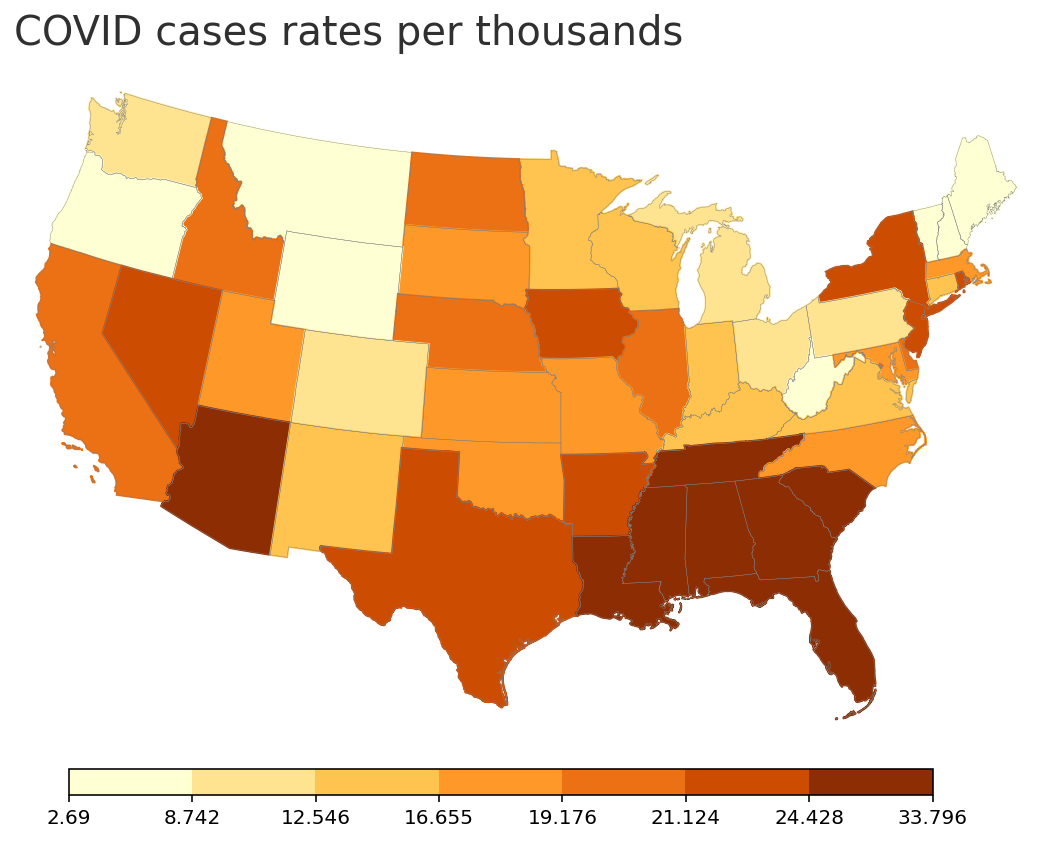

In [141]:
fig, ax = plt.subplots(figsize = (12, 6))
m = Basemap(llcrnrlon = -119, llcrnrlat = 22, urcrnrlon = -64, urcrnrlat = 49, 
           projection = 'lcc', lat_1 = 33, lat_2 = 45, lon_0 = -95)

shape = m.readshapefile("data/st99_d00", name = "states", drawbounds = True, 
                       linewidth = 0.2, color = "#808080")
ax = plt.gca()

#just get the list of the states in the data
states = [shapedict['NAME'] for shapedict in m.states_info]

for i, seq in enumerate(m.states): 
    state = states[i]
    color = state2color[state]
    poly = Polygon(seq, facecolor = color, edgecolor = color)
    ax.add_patch(poly)

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.annotate("COVID cases rates per thousands", xy = (0, 1.05), xycoords = "axes fraction", 
            fontsize = 20, color = "#303030")

# add at the [left, bottom, width, height] 
ax_c = fig.add_axes([0.25, 0.05, 0.5, 0.03])

cmap = mpl.colors.ListedColormap(colors)
cb2 = ColorbarBase(ax_c, cmap = cmap, boundaries = bounds, ticks = bounds, 
                   label = boundaries, orientation = "horizontal")

cb2.set_label("")
cb2.set_ticklabels(boundaries)